<h2>[5주차 과제]</h2>
<h3>다음 데이터에 대해서 SVM을 적용하여 분류 과제를 진행해 주세요. 
조별로 SVM에서 적용하는 kernel은, poly, rbf, sigmoid 중 하나를 맡아서 사용합니다. 
sklearn.svm.SVC 함수에서 C와 gamma를 변경하여 accuracy와 과대적합에 미치는 영향을 시각화하고 논의하세요.</h3>

````
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples = 2000, noise = 0.2, factor = 0.05, random_state=2021)
plt.scatter(X[:,0], X[:,1], c = y, s = 50)
plt.show()
````


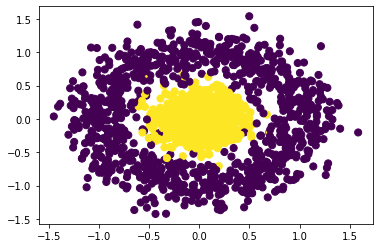

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples = 2000, noise = 0.2, factor = 0.05, random_state=2021)
plt.scatter(X[:,0], X[:,1], c = y, s = 50)
plt.show()

##<h1>Linear Kernel</h1>
<br>

[<h2>참고 블로그1(SVM 개념, C와 gamma)</h2>](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-2%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0-SVM)

[<h2>참고 블로그2(SVM)</h2>](https://datascienceschool.net/03%20machine%20learning/13.02%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0.html)

[<h2>참고 블로그3(Kernel SVM)</h2>](https://datascienceschool.net/03%20machine%20learning/13.03%20%EC%BB%A4%EB%84%90%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0.html)

<br>

<h2><b>1. 서포트와 마진</b></h2>

<img src="https://www.researchgate.net/publication/304611323/figure/fig8/AS:668377215406089@1536364954428/Classification-of-data-by-support-vector-machine-SVM.png" width="600" height="300">

<br>
<br>

<h2>$\mathbf{\beta}^{T}(\mathbf{X_{+}}-\mathbf{X_{-}})=2M$ </h2>
<h2>$ \max_{\beta_0, \beta} M \ $ s.t $ \\\ y_{i}(\beta_{0}+\beta^{T}X_{i}) =y_{i}(\beta_{0}+\mathbf{\beta}^{T}\mathbf{X_{i}})\geq M, ||\mathbf{\beta}||=1$</h2>
<br>
<h2>$\frac{\mathbf{\beta}^{T}}{\Vert{\mathbf{\beta}}\Vert}(\mathbf{X_{+}}-\mathbf{X_{-}})=\frac{2M}{\Vert\mathbf{\beta}\Vert}=(Normalized \ Bandwidth)$</h2>
<h2>$ \max_{\beta_0, \beta} M \ $ s.t $ \\\ y_{i}(\beta_{0}+\beta^{T}X_{i}) =y_{i}(\beta_{0}+\mathbf{\beta}^{T}\mathbf{X_{i}})\geq M, ||\mathbf{\beta}||=1$</h2>
<h2>$ \Leftrightarrow \min_{\beta_0, \beta} \Vert\mathbf{\beta}\Vert^{2} \ $ s.t $ \\\ y_{i}(\beta_{0}+\beta^{T}X_{i}) =y_{i}(\beta_{0}+\mathbf{\beta}^{T}\mathbf{X_{i}})\geq M=1$</h2>
<h3>Normalized Bandwidth를 최대화하는 문제에 있어 $M$을 최대화하거나 $\mathbf{\beta}$를 최소화하는 2가지 접근이 모두 가능하다.</h3>

<br>
<h2><b>2. 슬랙 변수</b></h2>
<img src="https://miro.medium.com/max/1400/1*M_3iYollNTlz0PVn5udCBQ.png" width="600" height="300">
<h3>만약 데이터가 직선인 판별 경계선으로 나누어지지 않는 즉, 선형분리(linear separable)가 불가능한 경우에는 다음과 같이 슬랙변수(slack variable,  $\ \xi_{i}$)를 사용하여 개별적인 오차를 허용할 수 있다.</h3>
<h2>$ \min_{\beta_0, \beta} \Vert\mathbf{\beta}\Vert^{2} \ $ s.t $ \\\ y_{i}(\beta_{0}+\beta^{T}X_{i}) =y_{i}(\beta_{0}+\mathbf{\beta}^{T}\mathbf{X_{i}})\geq 1-\xi_{i},\ \xi_{i} \geq 0,\ \sum_{i=1}^n \xi_{i} \leq \tilde{C}$</h2>
<br>
<h2><b>3. 듀얼 형식</b></h2>
<h3>주어진 최적화 문제(3.1)를 KKT 조건에 의해 풀면 $\beta_0, \beta, \xi_{i}$에 관한 문제를 $\alpha_{i}$에 관한 문제로 변환할 수 있다.</h3>
<h3>$\hat{\alpha_{i}}$을 구한 뒤, 이를 바탕으로 $\hat{\beta}$과 $\hat{\beta_{0}}$을 구한다.</h3>

<h2>$ \min_{\beta_0, \beta, \xi_{i}} \Vert\mathbf{\beta}\Vert^{2}+C\sum_{i=1}^n \xi_{i} \ $ s.t $ \\\ y_{i}(\beta_{0}+\beta^{T}X_{i}) =y_{i}(\beta_{0}+\mathbf{\beta}^{T}\mathbf{X_{i}})\geq 1-\xi_{i},\ \xi_{i} \geq 0$</h2>
<h2>$ \Leftrightarrow \min_{\beta_0, \beta, \xi_{i}} \Vert\mathbf{\beta}\Vert^{2}+C\sum_{i=1}^n \xi_{i}-\sum_{i=1}^n \gamma_{i}\xi_{i} \ $ s.t $ \\\ y_{i}(\beta_{0}+\beta^{T}X_{i}) =y_{i}(\beta_{0}+\mathbf{\beta}^{T}\mathbf{X_{i}})\geq 1-\xi_{i}$</h2>
<h2>$ \Leftrightarrow \min_{\beta_0, \beta, \xi_{i}} \Vert\mathbf{\beta}\Vert^{2}+C\sum_{i=1}^n \xi_{i}-\sum_{i=1}^n \gamma_{i}\xi_{i}- \sum_{i=1}^n \alpha_{i}[y_{i}(\beta_{0}+\mathbf{\beta}^{T}\mathbf{X_{i}})-(1-\xi_{i})] \cdots(3.1)$</h2>
<h2>$ \Leftrightarrow \max_{\alpha_{i}} \sum_{i=1}^n \alpha_{i}+ \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n \alpha_{i}\alpha_{j}y_{i}y_{j}\mathbf{x_{i}^{T}}\mathbf{x_{j}}$ s.t $ \\\ 0 \leq \alpha_{i} \leq C, \sum_{i=1}^n \alpha_{i}y_{i}=0 $ </h2>
<br>
<h2><b>4. 커널 트릭</b></h2>
<h3>데이터를 선형적인 판별 경계에 의해 구분할 수 없는 경우, 차원 변환을 통해 데이터의 분포를 변형한 뒤 선형적인 판별 경계를 통해 구분할 수 있다.</h3>
<img src="https://t1.daumcdn.net/cfile/tistory/2673D73E578C64732B" width="600" height="300">
<h3>이후 앞서 정의한 최적화 문제를 다시 풀면 아래의 식으로 나타낼 수 있다.</h3>
<h2>$ \max_{\alpha_{i}} \sum_{i=1}^n \alpha_{i}+ \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n \alpha_{i}\alpha_{j}y_{i}y_{j}\mathbf{h(x_{i})^{T}}\mathbf{h(x_{j})}$ s.t $ \\\ 0 \leq \alpha_{i} \leq C, \sum_{i=1}^n \alpha_{i}y_{i}=0 $ </h2>
<h3>이 때 두 개의 변환된 독립 변수 벡터를 내적(inner product) 한 값인 $\mathbf{h(x_{i})^{T}}\mathbf{h(x_{j})}$을 하나의 함수로 나타낼 수 있으며, 이를 커널 함수 $K(\mathbf{x_{i}},\mathbf{x_{j}})$로 정의한다. </h3>
<h2>$ \max_{\alpha_{i}} \sum_{i=1}^n \alpha_{i}+ \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n \alpha_{i}\alpha_{j}y_{i}y_{j}K(\mathbf{x_{i}},\mathbf{x_{j}})$ s.t $ \\\ 0 \leq \alpha_{i} \leq C, \sum_{i=1}^n \alpha_{i}y_{i}=0 $ </h2>
<br>
<h2><b>5. 커널 함수의 종류</b></h2>

<h3> 커널함수의 종류에는 linear, rbf, polynomial, sigmoid 등이 있으나, 일반적으로 rbf를 가장 보편적으로 사용한다.</h3>
<h2>$K(\mathbf{x_{i}},\mathbf{x_{j}})=\mathbf{x_{i}^{T}}\mathbf{x_{j}} \cdots Linear \ Kernel$</h2>
<h2>$K(\mathbf{x_{i}},\mathbf{x_{j}})=exp(-\gamma\Vert\mathbf{x_{i}}-\mathbf{x_{j}}\Vert^{2}) \cdots Gaussian \ Kernel$</h2>
<h2>$K(\mathbf{x_{i}},\mathbf{x_{j}})=(\gamma\mathbf{x_{i}^{T}}\mathbf{x_{j}}+\theta)^{d}
 \cdots Polynomial \ Kernel$</h2>
<h2>$K(\mathbf{x_{i}},\mathbf{x_{j}})=tanh(\gamma\mathbf{x_{i}^{T}}\mathbf{x_{j}}+\theta) \cdots Sigmoid \ Kernel$</h2>
<h3>이때 $\gamma \geq 0, \theta \geq 0, d=1, 2, \ldots $</h3>

<br> 
<h3>이제 슬랙변수 규제 parameter인 $C$와 커널 함수의 parameter인 $\gamma$에 따라 SVM의 분류가 어떻게 이뤄지는지 살펴보자!</h3>

<h3>우선 식 (3.1)에서 확인할 수 있듯 $C$는 슬랙변수들의 합이 너무 커지지 않도록 규제하는 역할을 한다. 즉 $C$를 크게 잡을수록 이상치의 존재 가능성을 낮게 보는 것이다.</h3>
<h3>또한 $\gamma$는 decision boundary의 굴곡에 영향을 미치는 Parameter이다. $\gamma$가 클수록 decision boundary는 더 굴곡진 형태로 나타나며, overfitting의 문제를 야기할 수 있다. </h3>

<h3>현재의 Dataset 형태에 대해 Linear Kernel을 사용하되, Kernel Trick을 사용하지 않은 경우와 사용한 경우를 비교해 Kernel Trick의 효과에 대해 알아본다. </h3>
<h3>이때 Linear Kernel에서는 $\gamma$가 없으므로, C만 변화를 주어 평가한다.</h3>


# 1. Kernel Trick 적용 이전

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


Automatically created module for IPython interactive environment


In [ ]:
def plot_SVM(X, y, C):
   # load dataset
    # X, y = make_circles(n_samples = 2000, noise = 0.2, factor = 0.05, random_state=2021)

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # C = 1.0  # SVM regularization parameter
    # gamma = 0.7 # SVM parameter
    models = (svm.SVC(kernel='linear', C=C[0]),
            svm.SVC(kernel='linear', C=C[1]),
            svm.SVC(kernel='linear', C=C[2]),
            svm.SVC(kernel='linear', C=C[3]))

    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('C={}'.format(C[0]),
            'C={}'.format(C[1]),
            'C={}'.format(C[2]),
            'C={}'.format(C[3]))

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2, figsize=(14,10))

    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                    cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title("{}, Accuracy={}".format(title, clf.score(X,y)))

    plt.suptitle('SVC with Different C values', fontsize=20)
    return plt.show()

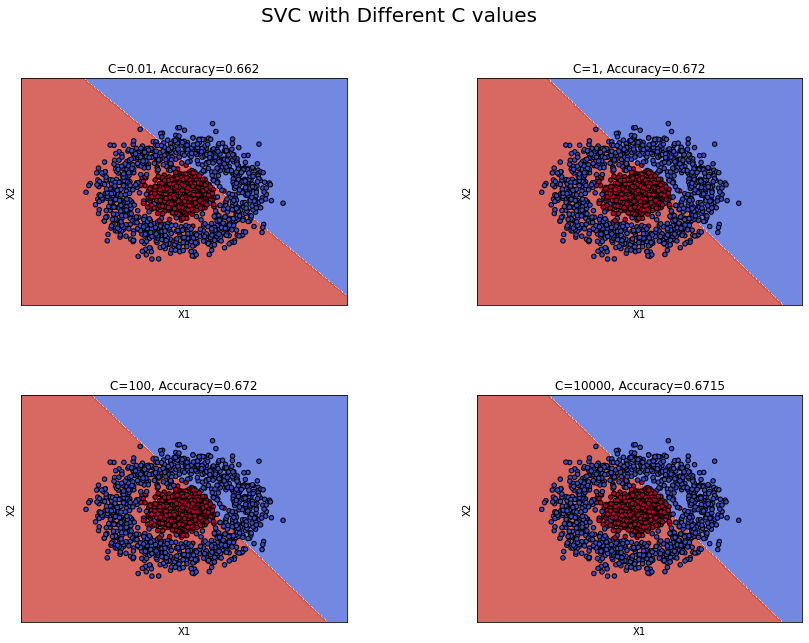

In [ ]:
plot_SVM(X, y, C=[1/100,1,100,10000])

# 2. Kernel Trick 적용 이후
<img src="https://www.researchgate.net/profile/Marouane-Hachimi/publication/340610860/figure/fig4/AS:880021191286786@1586824810950/Non-linear-classifier-using-Kernel-trick-16.ppm" width="600" height="300">

In [ ]:
# Kernel Trick
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    X0, X1 = X[:, 0], X[:, 1]
    return np.vstack([X0, X0**2+X1**2, X1]).T # X0**2+X1**2 추가

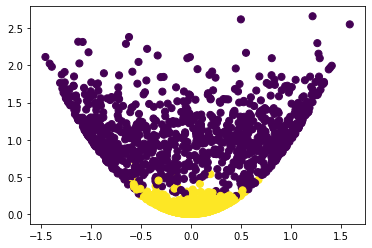

In [ ]:
X, y = make_circles(n_samples = 2000, noise = 0.2, factor = 0.05, random_state=2021)
X_transform = FunctionTransformer(basis).fit_transform(X)
plt.scatter(X_transform[:,0], X_transform[:,1], c = y, s = 50) # 2차원 단면.
plt.show()

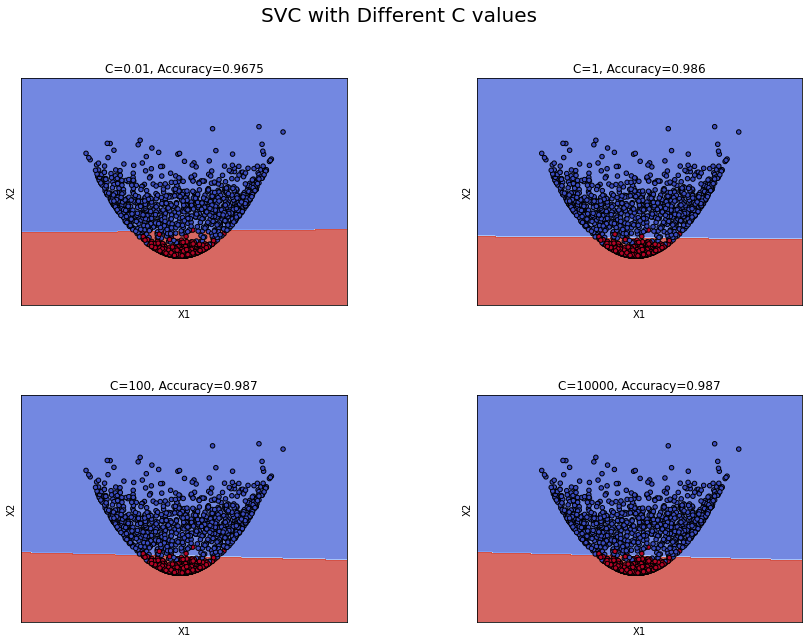

In [ ]:
plot_SVM(X_transform[:,0:2], y, C=[1/100,1,100,10000]) # C가 커질수록 sample에 과대적합되는 경향을 보임